# Bias a priori

*When implementing an AI system, fairness and biases must be an important component during conception, especially when dealing with sensitive information, and/or Personally Identifiable Information (PII), and/or Personal Health Information (PHI). Indeed, not only those information are bound to the law (e.g., GDPR in Europe), but they are also bound to a brand image challenge.*

Today's example aims at **assigning a risk with recruitment data**.

Before implementing any AI system to predict the likelihood of a candidate to be hired, **AI engineers AND business stakeholders** should:

- Sit and identify potential sources of biases
- Define one or several metrics that will quantify the bias of the AI system

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Selecting features for the model
features = ['Age', 'Gender', 'EdLevel', 'YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']
target = 'Employed'

# Preparing the data
X = cleaned_data[features]
y = cleaned_data[target]

# Defining categorical and numerical features
categorical_features = ['Age', 'Gender', 'EdLevel']
numerical_features = ['YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']

# Creating transformers for the preprocessing
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating a pipeline that first preprocesses the data and then applies logistic regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model.fit(X_train, y_train)

# The model is now trained. Next, we'll evaluate its performance.
model'''


"from sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler, OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.linear_model import LogisticRegression\n\n# Selecting features for the model\nfeatures = ['Age', 'Gender', 'EdLevel', 'YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']\ntarget = 'Employed'\n\n# Preparing the data\nX = cleaned_data[features]\ny = cleaned_data[target]\n\n# Defining categorical and numerical features\ncategorical_features = ['Age', 'Gender', 'EdLevel']\nnumerical_features = ['YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills']\n\n# Creating transformers for the preprocessing\ncategorical_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),\n    ('onehot', OneHotEncoder(handle_unknown='ignore'))\n])\n\nnumerical_transformer = Pipeline(st

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = '/content/drive/My Drive/stackoverflow_full.csv'
dataset = pd.read_csv(path)
dataset.head()
data_copy = dataset.copy()


In [ ]:
data_copy

Unnamed: 0  Age Accessibility        EdLevel  Employment     Gender  \
0               0  <35            No         Master           1        Man   
1               1  <35            No  Undergraduate           1        Man   
2               2  <35            No         Master           1        Man   
3               3  <35            No  Undergraduate           1        Man   
4               4  >35            No            PhD           0        Man   
...           ...  ...           ...            ...         ...        ...   
73457       73457  <35            No  Undergraduate           1        Man   
73458       73458  >35            No  Undergraduate           1        Man   
73459       73459  <35            No  Undergraduate           1        Man   
73460       73460  <35           Yes  Undergraduate           1        Man   
73461       73461  <35            No         Master           1  NonBinary   

      MentalHealth MainBranch  YearsCode  YearsCodePro  \
0               No        Dev          7             4   
1               No        Dev         12             5   
2               No        Dev         15             6   
3               No        Dev          9             6   
4               No     NotDev         40            30   
...            ...        ...        ...           ...   
73457           No        Dev          7             2   
73458           No        Dev         21            16   
73459           No        Dev          4             3   
73460          Yes        Dev          5             1   
73461           No        Dev         10             3   

                                                 Country  PreviousSalary  \
0                                                 Sweden         51552.0   
1                                                  Spain         46482.0   
2                                                Germany         77290.0   
3                                                 Canada         46135.0   
4                                              Singapore        160932.0   
...                                                  ...             ...   
73457                                            Germany         41058.0   
73458                           United States of America        115000.0   
73459                                            Nigeria         57720.0   
73460                           United States of America         70000.0   
73461  United Kingdom of Great Britain and Northern I...         75384.0   

                                          HaveWorkedWith  ComputerSkills  \
0                              C++;Python;Git;PostgreSQL               4   
1      Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...              12   
2                 C;C++;Java;Perl;Ruby;Git;Ruby on Rails               7   
3      Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...              13   
4                                             C++;Python               2   
...                                                  ...             ...   
73457  C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...              13   
73458  C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...              11   
73459  HTML/CSS;JavaScript;TypeScript;Docker;Express;...              12   
73460  C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...              15   
73461                                      Python;Docker               2   

       Employed  
0             0  
1             1  
2             0  
3             0  
4             0  
...         ...  
73457         1  
73458         1  
73459         1  
73460         1  
73461         0  

[73462 rows x 15 columns]

In [ ]:
data_undergraduated = data_copy.loc[data_copy.EdLevel == 'Undergraduate']
data_undergraduated

In [ ]:
data_graduated = data_copy.loc[data_copy.EdLevel != 'Undergraduate']
data_graduated

In [ ]:
data_copy.EdLevel.unique()

NameError: ignored

In [ ]:
for row in data_copy.index:
  if data_copy.loc[row,'EdLevel'] == 'Undergraduate	':
    data_copy[data_copy.loc[row,'EdLevel']] = 0
  else

In [ ]:
data_copy
#not relevant : Age, Gender,PreviousSalary
#20 fois plus de mecs, est ce qu'on entraine notre modele sur 20 set de donnees ?
data_copy.Gender.value_counts()

Man          68573
Woman         3518
NonBinary     1371
Name: Gender, dtype: int64

In [ ]:
'''for row in data.index
  if data_copy.loc[row, 'Age'] == '<35':
    data_copy.loc[row, 'Age'] = 0
  else:
    data_copy.loc[row, 'Age'] = 1
  data_copy'''

SyntaxError: ignored

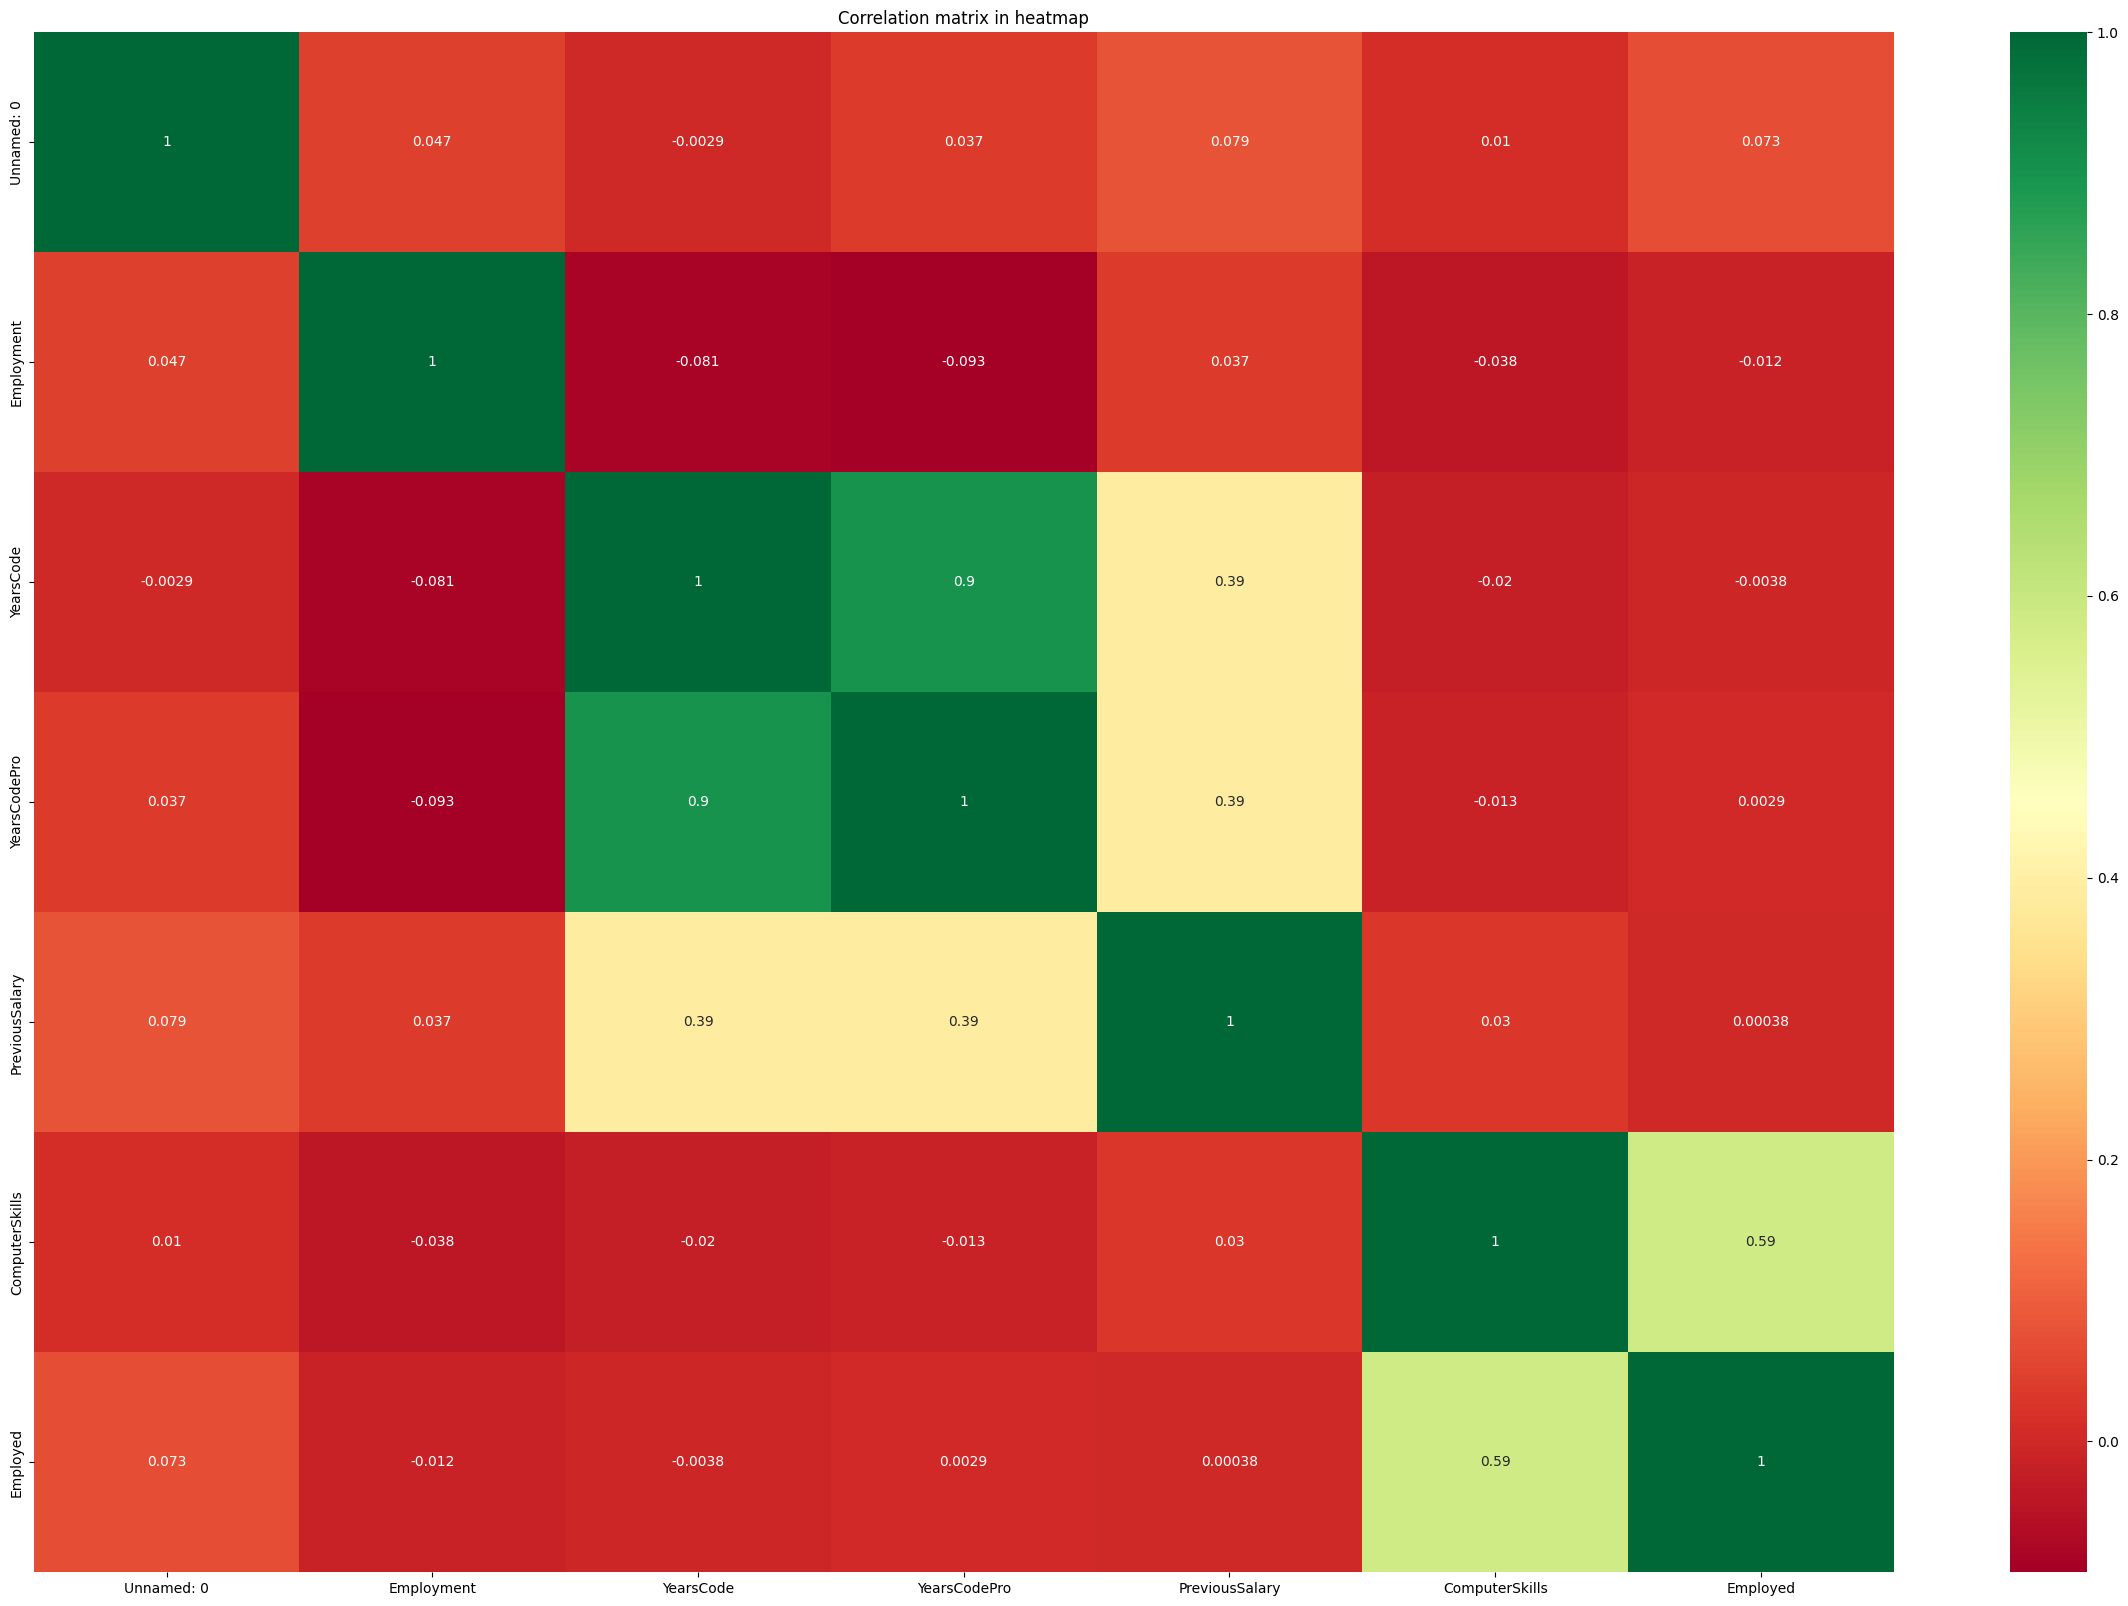

In [ ]:
#matrice de correlation
df_corr = data_copy.corr(numeric_only=True)
plt.figure(figsize=(30,20))
plt.title("Correlation matrix in heatmap")

sns.heatmap(df_corr,annot=True, cmap="RdYlGn")
plt.show()

Biais:


*   Age (supprimé)
*   Sexe (a garder)
*   Computer skills peut introduire un biais si le candidat emt bcp de competences dans 'HaveWorkedWith' qui n'ont rien a voir avec le job. car generalement plus il y a de computerskils, plus un candidat a de chence d'etre embauché
*   



In [ ]:
'''#labélisation de country
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

label_dataset = dataset.copy()


dataset['Country'] = ordinal_encoder.fit_transform(pd.DataFrame(dataset['Country']))
len(dataset['Country'].unique())'''

"#labélisation de country\nfrom sklearn.preprocessing import OrdinalEncoder\n\nordinal_encoder = OrdinalEncoder()\n\nlabel_dataset = dataset.copy()\n\n\ndataset['Country'] = ordinal_encoder.fit_transform(pd.DataFrame(dataset['Country']))\nlen(dataset['Country'].unique())"

## Dataset

StackOverflow's annual user-generated survey (over 70,000 responses from over 180 countries) of developers examines all aspects of the developer experience, from learning code to preferred technologies, version control and work experience.

From the survey results, we have built a dataset with the following columns:
- **Age**: age of the applicant, >35 years old or <35 years old *(categorical)*
- **EdLevel**: education level of the applicant (Undergraduate, Master, PhD...) *(categorical)*
- **Gender**: gender of the applicant, (Man, Woman, or NonBinary) *(categorical)*
- **MainBranch**: whether the applicant is a profesional developer *(categorical)*
- **YearsCode**: how long the applicant has been coding *(integer)*
- **YearsCodePro**: how long the applicant has been coding in a professional context, *(integer)*
- **PreviousSalary**: the applicant's previous job salary *(float)*
- **ComputerSkills**: number of computer skills known by the applicant *(integer)*
- **Employed**: target variable, whether the applicant has been hired *(categorical)*


In [ ]:
#a savoir:
#il y a 172 pays -> a ordinalEncoder
#il y a 116 competences (haveworkedwith) -> obliger de onehotEncoder

In [ ]:
#preuve

object_cols = ['EdLevel', 'Gender','MentalHealth', 'MainBranch','Country', 'Accessibility' ]
for col in object_cols:
  print(len(dataset[col].unique()))


5
3
2
2
172
2


In [ ]:
tab=[]
for row in dataset.index:
  if type(dataset.loc[row, 'HaveWorkedWith']) == str:
    tab += dataset.loc[row, 'HaveWorkedWith'].split(';')
len(pd.Series(tab).unique())

#fin - preuve

116

## Exploratory Data Analysis


In [ ]:
#checking for missing values
j=0
for i in dataset.columns:
    print(dataset.columns[j], dataset[i].isnull().sum())
    j+=1
#seule colone comportant des valeurs manquantes: 'HaveWorkedWith'

#fin - checking for missing values

Unnamed: 0 0
Age 0
Accessibility 0
EdLevel 0
Employment 0
Gender 0
MentalHealth 0
MainBranch 0
YearsCode 0
YearsCodePro 0
Country 0
PreviousSalary 0
HaveWorkedWith 63
ComputerSkills 0
Employed 0


In [ ]:
#remarque importante

print(dataset.loc[dataset.HaveWorkedWith.isnull()].shape[0])
print(dataset.loc[(dataset.HaveWorkedWith.isnull()) & (dataset.Employed == 0)].shape[0])
#tous les candidats dont 'HaveWorkedWith' est manquant ne sont pas employés

#fin - remarque importante

63
63


In [ ]:
#test
dataset.loc[1, 'HaveWorkedWith'].split(';')
#fin - test

['Bash/Shell',
 'HTML/CSS',
 'JavaScript',
 'Node.js',
 'SQL',
 'TypeScript',
 'Git',
 'Express',
 'React.js',
 'Vue.js',
 'AWS',
 'PostgreSQL']

In [ ]:
#cheking
dataset.dtypes
# fin - cheking

Unnamed: 0          int64
Age                object
Accessibility      object
EdLevel            object
Employment          int64
Gender             object
MentalHealth       object
MainBranch         object
YearsCode           int64
YearsCodePro        int64
Country            object
PreviousSalary    float64
HaveWorkedWith     object
ComputerSkills      int64
Employed            int64
dtype: object

In [ ]:
#gestion de 'HaveWorkedWith' trop lent

for row in dataset.index:
  #print(row)
  if type(dataset.loc[row, 'HaveWorkedWith']) == float:
    dataset.loc[row, 'nan'] = 1
  else:
    tab = dataset.loc[row, 'HaveWorkedWith'].split(';')
    for feature in tab:
        dataset.loc[row, feature] = 1
dataset.head()

'''# Utiliser str.get_dummies pour créer la représentation one-hot
one_hot = dataset['HaveWorkedWith'].str.get_dummies(sep=';')

# Ajouter les colonnes one-hot à votre DataFrame
dataset = pd.concat([dataset, one_hot], axis=1)

# Supprimer la colonne d'origine 'HaveWorkedWith'
dataset = dataset.drop(['HaveWorkedWith'], axis=1)

# Afficher le résultat
print(dataset.head())'''

<ipython-input-72-f5f50ef4fd5d>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset.loc[row, feature] = 1
<ipython-input-72-f5f50ef4fd5d>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset.loc[row, feature] = 1
<ipython-input-72-f5f50ef4fd5d>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy(

Unnamed: 0  Age Accessibility        EdLevel  Employment Gender  \
0           0  <35            No         Master           1    Man   
1           1  <35            No  Undergraduate           1    Man   
2           2  <35            No         Master           1    Man   
3           3  <35            No  Undergraduate           1    Man   
4           4  >35            No            PhD           0    Man   

  MentalHealth MainBranch  YearsCode  YearsCodePro  ... MATLAB  \
0           No        Dev          7             4  ...    NaN   
1           No        Dev         12             5  ...    NaN   
2           No        Dev         15             6  ...    NaN   
3           No        Dev          9             6  ...    NaN   
4           No     NotDev         40            30  ...    NaN   

   Managed Hosting Fortran  Lua  SAS  Play Framework  Phoenix  OCaml  \
0              NaN     NaN  NaN  NaN             NaN      NaN    NaN   
1              NaN     NaN  NaN  NaN             NaN      NaN    NaN   
2              NaN     NaN  NaN  NaN             NaN      NaN    NaN   
3              NaN     NaN  NaN  NaN             NaN      NaN    NaN   
4              NaN     NaN  NaN  NaN             NaN      NaN    NaN   

   Colocation  Solidity  
0         NaN       NaN  
1         NaN       NaN  
2         NaN       NaN  
3         NaN       NaN  
4         NaN       NaN  

[5 rows x 132 columns]

In [ ]:
#j'enleve la colone 'nan' car fortement correlée a 'Employé' => modele serait biaisé
dataset = dataset.drop(['nan'], axis = 1)
#j'enleve la colonne 'HaveWorkedWith' car je viens de l'encoder
dataset = dataset.drop(['HaveWorkedWith'], axis=1)
dataset.loc[:,'Employed':'Solidity'] = dataset.loc[:,'Employed':'Solidity'].fillna(0)
dataset.loc[:,'Employed':'Solidity']
#j'enleve ComputerSkills (voir plus haut)
dataset = dataset.drop(['ComputerSkills'], axis=1)
dataset.columns
#fin - gestion de 'HaveWorkedWith'

Index(['Unnamed: 0', 'Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender',
       'MentalHealth', 'MainBranch', 'YearsCode', 'YearsCodePro',
       ...
       'MATLAB', 'Managed Hosting', 'Fortran', 'Lua', 'SAS', 'Play Framework',
       'Phoenix', 'OCaml', 'Colocation', 'Solidity'],
      dtype='object', length=129)

In [ ]:
data = dataset.copy()
all_skills = data.columns[list(dataset.columns).index('C++'):list(dataset.columns).index('Solidity')+1]
#all_skills = dataset.loc['C++':'Solidity'].columns
all_skills

Index(['C++', 'Python', 'Git', 'PostgreSQL', 'Bash/Shell', 'HTML/CSS',
       'JavaScript', 'Node.js', 'SQL', 'TypeScript',
       ...
       'MATLAB', 'Managed Hosting', 'Fortran', 'Lua', 'SAS', 'Play Framework',
       'Phoenix', 'OCaml', 'Colocation', 'Solidity'],
      dtype='object', length=116)

In [ ]:
def skilling(serie, col_with_skills='HaveWorkedWith', all_skills= all_skills): #ordonner all_skills dans le bon ordre
  for skill in all_skills:
    serie[skill] = 0
  for skill in serie[col_with_skills].split(';'):
    serie[skill] = 1
  return serie

In [ ]:
#La colone 'age' introduit un biais non necessaire,Edlevel est plus approprié
#Job approprié a une fonction (cherche-t-on un individu sortant tout droit de l'université rihe en energie pour exploiter les nouveautés(undergraduate), ou cherche-ton un plus experimenté(Phd))
#Suppression de la colonne 'age'

#La colone 'gender' est a garder pour avoir la meme proportion de femme et d'homme choisis
#Meme pied d'égalité

#j'enleve la colonne 'Unnamed:0' (premiere colonne)

#Scaling continuous variables
#OneHotEncoding le reste des variables

In [ ]:
#suppression de 'Age' et 'Unnamed: 0'

dataset = dataset.drop(['Age'], axis =1) #uncomment when running all
dataset = dataset.drop(['Unnamed: 0'], axis=1)
dataset.head()

#fin - suppression de 'Age' et 'Unnamed: 0'

Accessibility        EdLevel  Employment Gender MentalHealth MainBranch  \
0            No         Master           1    Man           No        Dev   
1            No  Undergraduate           1    Man           No        Dev   
2            No         Master           1    Man           No        Dev   
3            No  Undergraduate           1    Man           No        Dev   
4            No            PhD           0    Man           No     NotDev   

   YearsCode  YearsCodePro    Country  PreviousSalary  ...  MATLAB  \
0          7             4     Sweden         51552.0  ...     0.0   
1         12             5      Spain         46482.0  ...     0.0   
2         15             6    Germany         77290.0  ...     0.0   
3          9             6     Canada         46135.0  ...     0.0   
4         40            30  Singapore        160932.0  ...     0.0   

   Managed Hosting  Fortran  Lua  SAS  Play Framework  Phoenix  OCaml  \
0              0.0      0.0  0.0  0.0             0.0      0.0    0.0   
1              0.0      0.0  0.0  0.0             0.0      0.0    0.0   
2              0.0      0.0  0.0  0.0             0.0      0.0    0.0   
3              0.0      0.0  0.0  0.0             0.0      0.0    0.0   
4              0.0      0.0  0.0  0.0             0.0      0.0    0.0   

   Colocation  Solidity  
0         0.0       0.0  
1         0.0       0.0  
2         0.0       0.0  
3         0.0       0.0  
4         0.0       0.0  

[5 rows x 127 columns]

In [ ]:
def supp_col(dataset, col_to_supp):
  for col in col_to_supp:
    dataset = dataset.drop([col])
  return dataset

In [ ]:
dataset.dtypes

Accessibility      object
EdLevel            object
Employment          int64
Gender             object
MentalHealth       object
                   ...   
Play Framework    float64
Phoenix           float64
OCaml             float64
Colocation        float64
Solidity          float64
Length: 127, dtype: object

In [ ]:
dataset['YearsCode']

0         7
1        12
2        15
3         9
4        40
         ..
73457     7
73458    21
73459     4
73460     5
73461    10
Name: YearsCode, Length: 73462, dtype: int64

In [ ]:
#Mise a l'échelle
from mlxtend.preprocessing import minmax_scaling
original_data = pd.DataFrame(dataset['PreviousSalary'])
scaled_data = minmax_scaling(original_data, columns=['PreviousSalary'])
scaled_data.head()


PreviousSalary
0        0.230139
1        0.207505
2        0.345042
3        0.205956
4        0.718445

In [ ]:
dataset = dataset.drop(['PreviousSalary'], axis = 1)
dataset = pd.concat([dataset,scaled_data], axis =1)
#fin - Mise a l'échelle
dataset.columns

Index(['Accessibility', 'EdLevel', 'Employment', 'Gender', 'MentalHealth',
       'MainBranch', 'YearsCode', 'YearsCodePro', 'Country', 'Employed',
       ...
       'Managed Hosting', 'Fortran', 'Lua', 'SAS', 'Play Framework', 'Phoenix',
       'OCaml', 'Colocation', 'Solidity', 'PreviousSalary'],
      dtype='object', length=127)

In [ ]:
dataset['PreviousSalary']

0        0.230139
1        0.207505
2        0.345042
3        0.205956
4        0.718445
           ...   
73457    0.183291
73458    0.513391
73459    0.257675
73460    0.312497
73461    0.336533
Name: PreviousSalary, Length: 73462, dtype: float64

In [ ]:
def scaling(dataset, col_to_scale='PreviousSalary'):
  from mlxtend.preprocessing import minmax_scaling
  original_data = pd.DataFrame(dataset.PreviousSalary, index = [1])
  scaled_data = minmax_scaling(original_data, columns=[col_to_scale])
  dataset = dataset.drop([col_to_scale], axis = 1)
  dataset = pd.concat([dataset,scaled_data], axis =1)
  return dataset

In [ ]:
dataset.columns


Index(['Accessibility', 'EdLevel', 'Employment', 'Gender', 'MentalHealth',
       'MainBranch', 'YearsCode', 'YearsCodePro', 'Country', 'Employed',
       ...
       'Managed Hosting', 'Fortran', 'Lua', 'SAS', 'Play Framework', 'Phoenix',
       'OCaml', 'Colocation', 'Solidity', 'PreviousSalary'],
      dtype='object', length=127)

In [ ]:
dataset.dtypes

Accessibility      object
EdLevel            object
Employment          int64
Gender             object
MentalHealth       object
                   ...   
Phoenix           float64
OCaml             float64
Colocation        float64
Solidity          float64
PreviousSalary    float64
Length: 127, dtype: object

In [ ]:
#One hot Codage des valeurs catégoriques sauf country (va etre labélisé)
from sklearn.preprocessing import OneHotEncoder

object_cols = ['Employment', 'EdLevel', 'Gender','MentalHealth', 'MainBranch', 'Accessibility' ]

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

encoded_dataset = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))

# One-hot encoding removed index; put it back
encoded_dataset.index = dataset.index

# Remove categorical columns (will replace with one-hot encoding)
dataset = dataset.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
dataset = pd.concat([dataset, encoded_dataset], axis=1)

# Ensure all columns have string type
dataset.columns = dataset.columns.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
def OH_encoding(dataset, object_cols = ['Employment', 'EdLevel', 'Gender','MentalHealth', 'MainBranch', 'Accessibility' ]):
  encoded_dataset = pd.DataFrame(OH_encoder.transform(dataset[object_cols]))
  encoded_dataset.index = dataset.index
  dataset = dataset.drop(object_cols, axis=1)
  dataset = pd.concat([dataset, encoded_dataset], axis=1)
  dataset.columns = dataset.columns.astype(str)
  return dataset

In [ ]:
#labélisation de country

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

label_dataset = dataset.copy()


dataset['Country'] = ordinal_encoder.fit_transform(pd.DataFrame(dataset['Country']))
dataset['Country']

0        146.0
1        141.0
2         54.0
3         27.0
4        135.0
         ...  
73457     54.0
73458    164.0
73459    110.0
73460    164.0
73461    162.0
Name: Country, Length: 73462, dtype: float64

In [ ]:
def label_encoding(dataset, col_to_encode='Country'):
  dataset[col_to_encode] = ordinal_encoder.transform(pd.DataFrame(dataset[col_to_encode]))
  return dataset

In [ ]:
dataset.shape

(73462, 137)

In [ ]:
data_copy.columns

Index(['Unnamed: 0', 'Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender',
       'MentalHealth', 'MainBranch', 'YearsCode', 'YearsCodePro', 'Country',
       'PreviousSalary', 'HaveWorkedWith', 'ComputerSkills', 'Employed'],
      dtype='object')

In [ ]:
data_copy.loc[1,:]

Unnamed: 0                                                        1
Age                                                             <35
Accessibility                                                    No
EdLevel                                               Undergraduate
Employment                                                        1
Gender                                                          Man
MentalHealth                                                     No
MainBranch                                                      Dev
YearsCode                                                        12
YearsCodePro                                                      5
Country                                                       Spain
PreviousSalary                                              46482.0
HaveWorkedWith    Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...
ComputerSkills                                                   12
Employed                                        

In [ ]:
print(dataset.columns)


Index(['YearsCode', 'YearsCodePro', 'Country', 'Employed', 'C++', 'Python',
       'Git', 'PostgreSQL', 'Bash/Shell', 'HTML/CSS',
       ...
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15'],
      dtype='object', length=137)


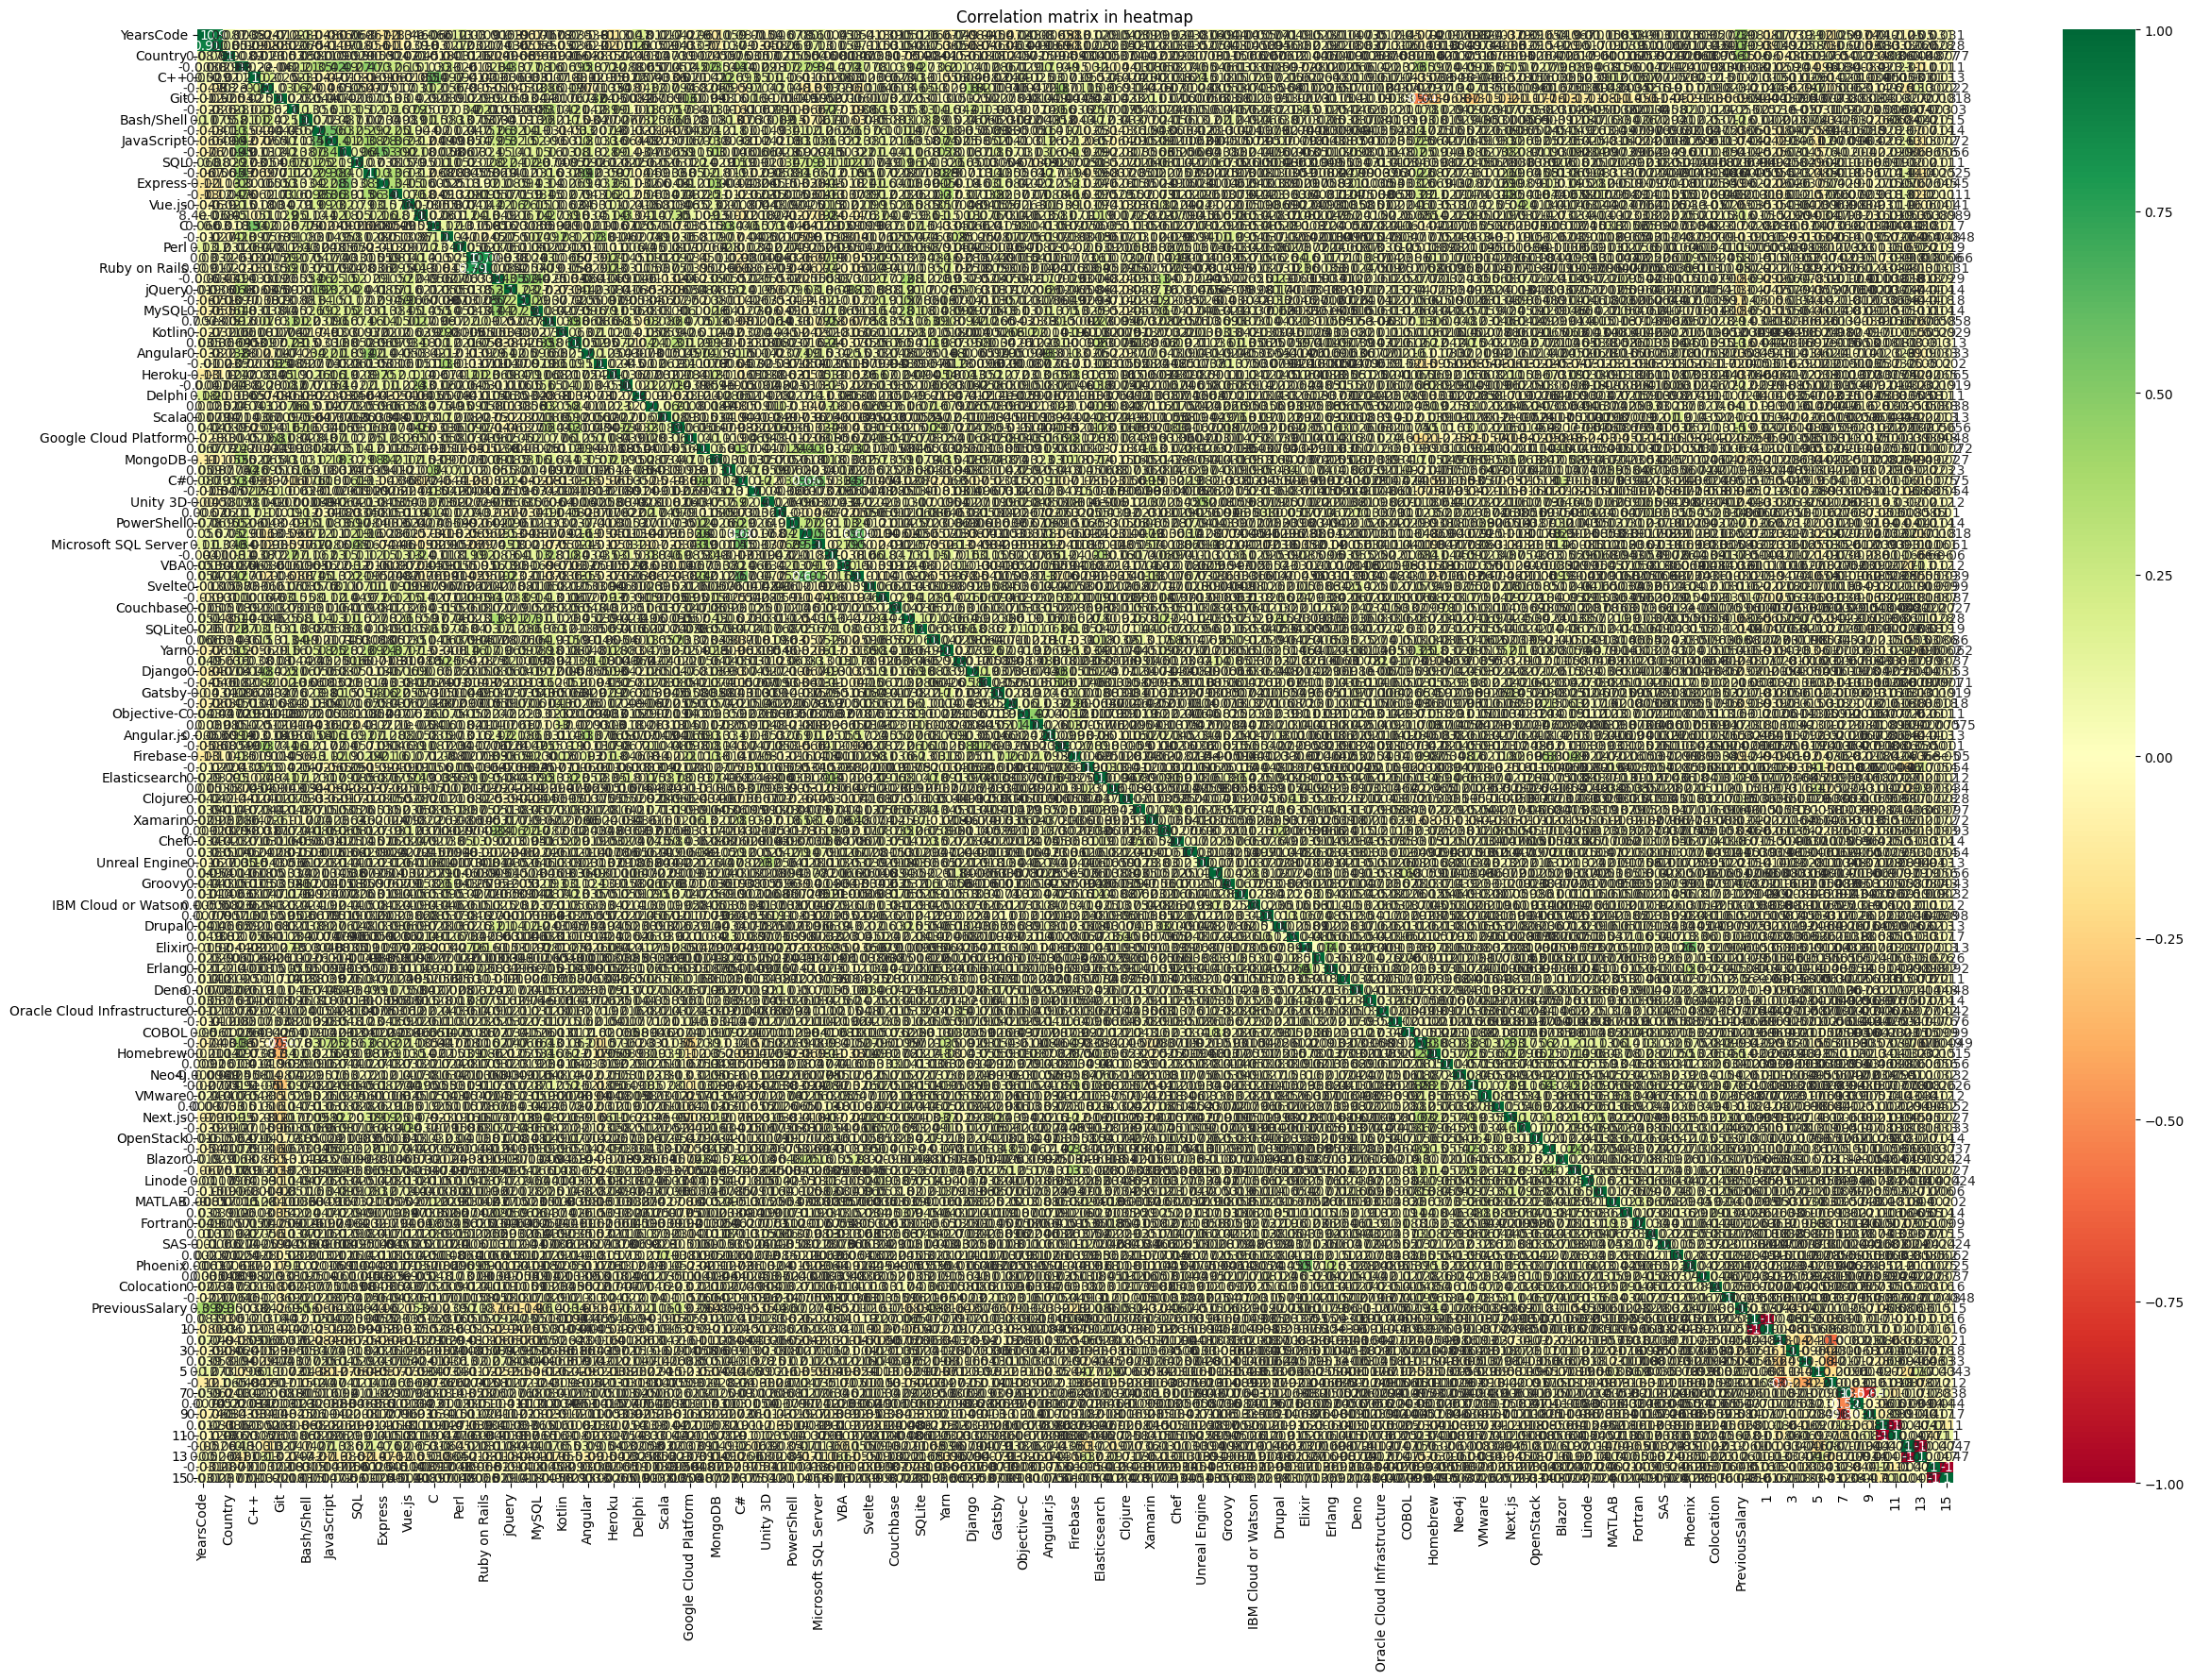

In [ ]:
#matrice de correlation
df_corr = dataset.corr(numeric_only=True)
plt.figure(figsize=(30,20))
plt.title("Correlation matrix in heatmap")

sns.heatmap(df_corr,annot=True, cmap="RdYlGn")
plt.show()

In [ ]:
#fonction pour convertir vecteur(candidat) en donnee exploitable par le systeme
#X = vect('Unnamed: 0','Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender',
#       'MentalHealth', 'MainBranch', 'YearsCode', 'YearsCodePro', 'Country',
#       'PreviousSalary', 'HaveWorkedWith', 'ComputerSkills')
def vectorisation(X):
  X = skilling(X)
  X = supp_col(X, ['Unnamed: 0','Age', 'ComputerSkills']) #enlever 'Unnamed: 0','Age', 'ComputerSkills'
  X = scaling(X)
  X = OH_encoding(X)
  X = label_encoding(X)
  return X
vectorisation(data_copy.loc[1,:])

<ipython-input-75-651347424a8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie[skill] = 0
<ipython-input-75-651347424a8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie[skill] = 0
<ipython-input-75-651347424a8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie[skill] = 0
<ipython-input-75-651347424a8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

ValueError: ignored

## Modeling

In [ ]:
#tu peux commencer a travailler avec cette database
dataset

## Fairness performance

To facilitate the development of a responsible model, we use the dalex python package: https://dalex.drwhy.ai/


Quoting Dalex' tutorial:


> The idea is that ratios between scores of privileged and unprivileged metrics should be close to 1. The closer, the fairer. To relax this criterion a little bit, it can be written more thoughtfully:

> $$ \forall i \in \{a, b, ..., z\}, \quad \epsilon < \frac{metric_i}{metric_{privileged}} < \frac{1}{\epsilon}.$$

> Where the epsilon is a value between 0 and 1, it should be a minimum acceptable value of the ratio. On default, it is 0.8, which adheres to four-fifths rule (80% rule) often looked at in hiring, for example.
"

##### Metrics used

Description of the metrics used for the fairness performance evaluation of each strategys:



- **Equal opportunity ratio** computed from True positive rate (recall)

> This number describes the proportions of correctly classified positive instances.

> $TPR = \frac{TP}{P}$

- **Predictive parity ratio** computed from Positive predicted value (precision)

> This number describes the ratio of samples which were correctly classified as positive from all the positive predictions.

> $PPV = \frac{TP}{TP + FP}$

- **Accuracy equality ratio** computed from Accuracy

> This number is the ratio of the correctly classified instances (positive and negative) of all decisions.

> $ACC = \frac{TP + TN}{TP + FP + TN + FN}$

- **Predictive equality ratio** computed from False positive rate

> This number describes the share the proportion of actual negatives which was falsely classified as positive.

> $FPR = \frac{FP}{TP + TN}$

- **Statistical parity ratio** computed from Positive rate

> This number is the overall rate of positively classified instances, including both correct and incorrect decisions.

> $PR = \frac{TP + FP}{TP + FP + TN + FN}$

**Notes**:
1. Fairness metrics work the exact same way as performance metrics do. If one was to fit a model on the entire dataset and foster overfitting (namely, skipping a `train_test_split` operation), she would end up with a non biased model.
2. A lots of metrics can be computed. It is important to define early in the conception which are the critical metrics to monitor

The method `model_fairness` returns a fairness object from which fairness evaluations can be conducted. Notice that every metrics inherited from the confusion matrix are computed during the instantiation.

Two methods can then be performed:
- The `fairness_check` method, which returns a report on the fairness of the model. It requires an epsilon parameter that corresponds to the threshold ratio below which a given metric is considered to be unfair (default value is 0.8).
- The `plot` method, which allows to visualize the main fairness ratios between the protected subgroups and the privileged one.